In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ann
from functools import reduce

Creat N donuts sharing the same center with radii listed in Rs. Classify the points belonging to each donut using the single layer Neural Network created in ann.py.

In [2]:
N = 1000 # number of total points 
Rs = [5,10,15, 20, 25] # radii of donuts
D = len(Rs) #number of donuts
Xs = [] #position of points

In [3]:
for R0 in Rs:
    R = np.random.randn(N//D) + R0
    # radial distance from origin is normally distributed around the donut radius 
    theta = 2*np.pi*np.random.random(N//D)
    # polar angle theta is uniformly distributed between (0, 2pi)
    X = np.concatenate([[R * np.cos(theta)], [R * np.sin(theta)]]).T
    Xs.append(X)

X = np.concatenate(Xs)

In [4]:
T = np.array(reduce(lambda a,b: a+b, [[i]*(N//D) for i in range(D)]))

This code creates data in order, starting from the smallest to the largest radius. But the fit module of the ANN object below picks the training set randomly from all the data points. 

This is what the data looks like. 

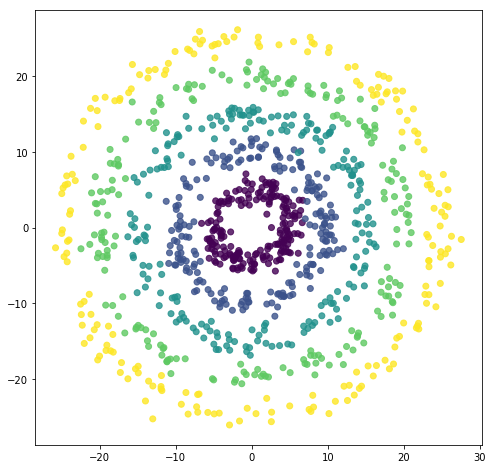

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=T, alpha=.8, marker='o')
plt.show()

In [80]:
neurons = 20 #num of neurons
ep = 50000 # number of epochs
donut = ann.ANN(M=neurons, activation='sigmoid')
donut.fit(X,T, learning_rate=1e-4, epoch_num=ep)

In [81]:
Y_pred=donut.predict(X)
print('classification rate =',donut.classification_rate(X,T))

classification rate = 0.978


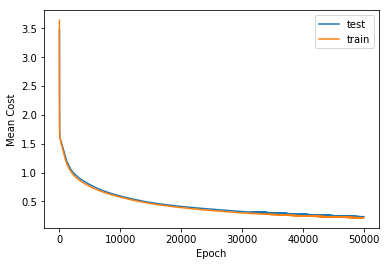

In [82]:
plt.plot(donut.cost_test, label = 'test')
plt.plot(donut.cost_train, label = 'train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean Cost')
plt.show()

The misclassified points are shown with large cross marks and darker colors. 

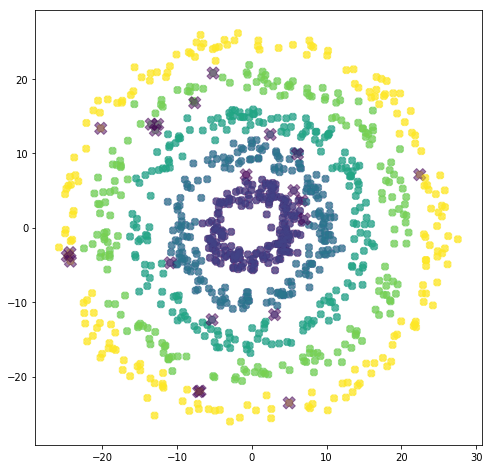

In [83]:
mis_fit = -1
colors_fit = np.asarray([item if (item==T[i]) else mis_fit for i, item in enumerate(Y_pred)])
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=T, alpha=.5, s=50, marker='o')
plt.scatter(X[:,0], X[:,1], c=colors_fit, alpha=.5, s=50+100*(Y_pred!=T), marker='X')
plt.show()